# Assignment: Running a Lasso Regression Analysis

## Assignment 2 of Machine Learning for Data Analysis

## Summary

A lasso regression analysis was conducted to identify a subset of variables from a pool of 8 categorical and quantitative predictor variables that best predicted a quantitative response variable indicating likelyhood of drug use. Predictors included White ethnicity, parents split, age at split, which parent remained, highest grade achieved, the persons job industry, job type and employer type. All predictor variables were standardized to have a mean of zero and a standard deviation of one.

Data were randomly split into a training set that included 70% of the observations (N=4141) and a test set that included 30% fo the observations (N=1775). The least angle regression algorithm with k=10 fold cross validation was used to estimate the lasso regression model in the training set, and the model was validated using the test set. The change in the cross validation average (mean) squared error at each step was used to identify the best subset of predictor variables.

### Figure 1. Change in the validation mean square error at each step

<img src="LassoMSE.png" />

Of the 8 predictor variables, 6 were retained in the selected model. During the estimation process, highest grade achieved and White ethnicity were most strong associated with drug use. Job industry and age parents split were negatively associated with drug use. Other predictors associated with drug use were job type and which parent remained. These 6 variables only accounted for 22% of the variance in the drug use response variable.

## Python Code

In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn import preprocessing

Import the data and set the column names.

In [2]:
nesarc_data = pd.read_csv("https://dl.dropboxusercontent.com/u/84673878/nesarc_output_cut.csv")
cols = ["WHITE","PARENTS_SPLIT","SPLIT_AGE","WHICH_PARENT_REMAINED","HIGHEST_GRADE",
        "JOB_INDUSTRY","JOB_TYPE","EMPLOYER_TYPE","DGSTATUS"]
nesarc_data.columns = cols

Convert each column to numeric so that we can apply NaN to all missing values using the errors='coerce' argument, which will make it easier to drop the NaNs.

In [3]:
nesarc_data = nesarc_data.apply(lambda x: pd.to_numeric(x,errors='coerce'))

Check the data types

In [4]:
nesarc_data.dtypes

WHITE                      int64
PARENTS_SPLIT              int64
SPLIT_AGE                float64
WHICH_PARENT_REMAINED    float64
HIGHEST_GRADE              int64
JOB_INDUSTRY             float64
JOB_TYPE                 float64
EMPLOYER_TYPE            float64
DGSTATUS                   int64
dtype: object

Remove the NaNs

In [5]:
nesarc_data = nesarc_data.dropna()

Convert the target to a binary variable, 0 = never used drugs, 1 = current or past drug user

In [6]:
row_index = nesarc_data.DGSTATUS == 3
nesarc_data.loc[row_index, 'DGSTATUS'] = 0
row_index = nesarc_data.DGSTATUS == 2
nesarc_data.loc[row_index, 'DGSTATUS'] = 1

Set the predictors and target

In [20]:
predictors = nesarc_data[["WHITE","PARENTS_SPLIT","SPLIT_AGE","WHICH_PARENT_REMAINED",
                          "HIGHEST_GRADE","JOB_INDUSTRY","JOB_TYPE","EMPLOYER_TYPE"]]
target = nesarc_data[["DGSTATUS"]].values

Using a lambda expression convert to float and scale each feature in the data frame

In [21]:
predictors = predictors.apply(lambda x: preprocessing.scale(x.astype('float64')))

Split data into train and test sets

In [26]:
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target.ravel(), 
                                                              test_size=.3, random_state=123)

Specify the lasso regression model

In [27]:
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

Print variable names and regression coefficients

In [28]:
dict(zip(predictors.columns, model.coef_))

{'EMPLOYER_TYPE': 0.0,
 'HIGHEST_GRADE': 0.030955359790505538,
 'JOB_INDUSTRY': -0.016007981694268519,
 'JOB_TYPE': 0.024171471888429465,
 'PARENTS_SPLIT': 0.0,
 'SPLIT_AGE': -0.013487542522897697,
 'WHICH_PARENT_REMAINED': 0.0044823646349358365,
 'WHITE': -0.045875891507303333}

Plot coefficient progression

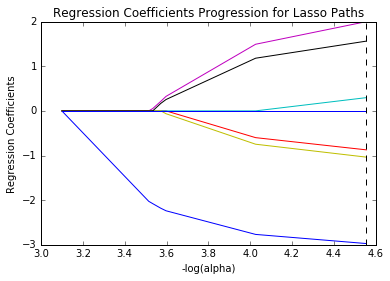

In [33]:
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

Plot mean square error for each fold

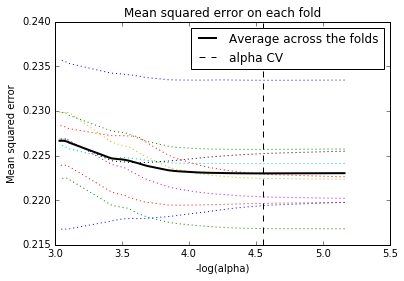

In [34]:
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

MSE from training and test data

In [35]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

training data MSE
0.222305405289
test data MSE
0.226786333965


R-square from training and test data

In [36]:
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data R-square
0.0189367035956
test data R-square
0.0170249122326
